In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

path = r"Data/trips/"

<Figure size 864x576 with 0 Axes>

In [9]:
#uber data
#Cols : Date/Time	Lat	Lon	Base
uberRawDataApr14 = pd.read_csv(path + "uber-raw-data-apr14.csv")
uberRawDataMay14 = pd.read_csv(path + "uber-raw-data-may14.csv")
uberRawDataJun14 = pd.read_csv(path + "uber-raw-data-jun14.csv")
uberRawDataJul14 = pd.read_csv(path + "uber-raw-data-jul14.csv")
uberRawDataAug14 = pd.read_csv(path + "uber-raw-data-aug14.csv")
uberRawDataSep14 = pd.read_csv(path + "uber-raw-data-sep14.csv")

uberRawDataSep14.head()
#uberRawDataSep14.info()
##uberRawDataSep14.describe()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [3]:
#we will read other files and 
#try to maintain the column name same across all files
#we have to convert dateTime to pandas datetime data type, so that we can separate them ahead

#Cols : Dispatching_base_num	Pickup_date	Affiliated_base_num	locationID
uberRawDataJanJune15 = pd.read_csv(path + "uber-raw-data-janjune-15.csv")
uberRawDataJanJune15 = uberRawDataJanJune15.rename(columns={"Pickup_date": "Date/Time"})
uberRawDataJanJune15['Date/Time'] = pd.to_datetime(uberRawDataJanJune15['Date/Time'])
uberRawDataJanJune15 = uberRawDataJanJune15.rename(columns={"Dispatching_base_num": "Dispatching_Base_No"})
uberRawDataJanJune15 = uberRawDataJanJune15.rename(columns={"Affiliated_base_num": "Affiliated_Base_No"})

uberRawDataJanJune15.head()

,Dispatching_Base_No,Date/Time,Affiliated_Base_No,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [32]:
#Cols : dispatching_base_number	date	active_vehicles	trips
uberJanFebFOIL = pd.read_csv(path + "Uber-Jan-Feb-FOIL.csv", encoding="ISO-8859-1")
uberJanFebFOIL = uberJanFebFOIL.rename(columns={"date": "Date/Time"})
uberJanFebFOIL['Date/Time'] = pd.to_datetime(uberJanFebFOIL['Date/Time'])
uberJanFebFOIL = uberJanFebFOIL.rename(columns={"dispatching_base_number": "Dispatching_Base_No"})

uberJanFebFOIL.head()

,Dispatching_Base_No,Date/Time,active_vehicles,trips
0,B02512,2015-01-01,190,1132
1,B02765,2015-01-01,225,1765
2,B02764,2015-01-01,3427,29421
3,B02682,2015-01-01,945,7679
4,B02617,2015-01-01,1228,9537


In [5]:
#this function will merge date and time into one col Date\Time
def mergeDateTime(df,dateColName, timeColName):
    df['Date/Time'] = df[dateColName] + ' ' + df[timeColName]
    #drop the original one
    df.drop([dateColName, timeColName], axis=1, inplace=True)
    #we have convert this date to pandas dateTime Data type
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    return df

In [6]:
#lets check other cabs provide's data

#Cols : DATE	TIME	PICK UP ADDRESS	Unnamed: 3	Unnamed: 4	Unnamed: 5
American_B01362 = pd.read_csv(path + "other-American_B01362.csv", encoding="ISO-8859-1")
mergeDateTime(American_B01362, 'DATE', 'TIME')
American_B01362 = American_B01362.rename(columns={"PICK UP ADDRESS": "Address"})
#unnamed columns are empty so dropping them
American_B01362 = American_B01362.dropna(how = 'all' , axis= 1)

American_B01362.head()

,Address,Date/Time
0,"874 E 139th St Mott Haven, BX",2014-07-01 00:00:00
1,"628 E 141st St Mott Haven, BX",2014-07-01 00:01:00
2,"601 E 156th St South Bronx, BX",2014-07-01 00:01:00
3,"708 E 138th St Mott Haven, BX",2014-07-01 00:01:00
4,"700 E 140th St Mott Haven, BX",2014-07-01 00:02:00


In [7]:
#Cols : Date	Time	PU_Adress	Base_No
Carmel_B00256 = pd.read_csv(path + "other-Carmel_B00256.csv", encoding="ISO-8859-1")
mergeDateTime(Carmel_B00256, 'Date', 'Time')
Carmel_B00256 = Carmel_B00256.rename(columns={"PU_Adress": "Address"})

Carmel_B00256.head()

,Address,Base_No,Date/Time
0,260 W 44 St NYC,B00256,2014-07-01 00:00:00
1,125 W 29 St Nyc,B00256,2014-07-01 00:00:00
2,141 W 28 St Nyc,B00256,2014-07-01 00:00:00
3,EWR,B00256,2014-07-01 00:01:00
4,JFK,B00256,2014-07-01 00:07:00


In [8]:
#Cols : Date	Time	State	PuFrom	Address	Street
Dial7_B00887 = pd.read_csv(path + "other-Dial7_B00887.csv", encoding="ISO-8859-1")
mergeDateTime(Dial7_B00887, 'Date', 'Time')

Dial7_B00887.head()

,State,PuFrom,Address,Street,Date/Time
0,NY ...,MANHATTAN,50,MURRAY ST,2014-07-06 14:30:00
1,NY ...,MANHATTAN,143,AVENUE B,2014-07-04 07:15:00
2,NY ...,MANHATTAN,125,CHRISTOPHER ST,2014-07-05 05:45:00
3,NY ...,MANHATTAN,217,E 7 ST,2014-07-06 04:30:00
4,NY ...,MANHATTAN,521,W 26 ST,2014-07-05 07:45:00


In [9]:
#Cols : Date	Time	PU_Address
Diplo_B01196 = pd.read_csv(path + "other-Diplo_B01196.csv", encoding="ISO-8859-1")
mergeDateTime(Diplo_B01196, 'Date', 'Time')
Diplo_B01196 = Diplo_B01196.rename(columns={"PU_Adress": "Address"})

Diplo_B01196.head()

,PU_Address,Date/Time
0,"2396 Valentine Ave Fordham, BX",2014-07-01 00:00:00
1,"1859 Walton Ave Morris Heights, BX",2014-07-01 00:01:00
2,"2431 Jerome Ave Jerome, BX",2014-07-01 00:02:00
3,"3044 Valentine Ave Fordham, BX",2014-07-01 00:05:00
4,"1085 Nelson Ave High Bridge, BX",2014-07-01 00:05:00


In [10]:
#Cols : Date	Time	PU_Address	DO_Address	Routing Details	PU_Address.1	Status
Federal_02216 = pd.read_csv(path + "other-Federal_02216.csv", encoding="ISO-8859-1")
mergeDateTime(Federal_02216, 'Date', 'Time')

Federal_02216.head()

,PU_Address,DO_Address,Routing Details,PU_Address.1,Status,Date/Time
0,"Brooklyn Museum, 200 Eastern Pkwy., BK NY;","1 Brookdale Plaza, BK NY;","PU: Brooklyn Museum, 200 Eastern Pkwy., BK NY;...","Brooklyn Museum, 200 Eastern Pkwy., BK NY; DO:...",Cancelled,2014-07-01 07:15:00
1,"33 Robert Dr., Short Hills NJ;","John F Kennedy International Airport, vitona A...","PU: 33 Robert Dr., Short Hills NJ; DO: John F ...","33 Robert Dr., Short Hills NJ; DO: John F Kenn...",Arrived,2014-07-01 07:30:00
2,"60 Glenmore Ave., BK NY;","2171 Nostrand Ave., BK NY;","PU: 60 Glenmore Ave., BK NY; DO: 2171 Nostrand...","60 Glenmore Ave., BK NY; DO: 2171 Nostrand Ave...",Assigned,2014-07-01 08:00:00
3,"128 East 31 St., BK NY;","369 93rd St., BK NY;","PU: 128 East 31 St., BK NY; DO: 369 93rd St., ...","128 East 31 St., BK NY; DO: 369 93rd St., BK NY;",Assigned,2014-07-01 09:00:00
4,"139-39 35 Ave., Flushing NY;",La Guardia Airport;,"PU: 139-39 35 Ave., Flushing NY; DO: La Guardi...","139-39 35 Ave., Flushing NY; DO: La Guardia Ai...",Assigned,2014-07-01 09:30:00


In [11]:
#Cols : DATE	TIME	PICK UP ADDRESS
Firstclass_B01536 = pd.read_csv(path + "other-Firstclass_B01536.csv", encoding="ISO-8859-1")
mergeDateTime(Firstclass_B01536, 'DATE', 'TIME')
Firstclass_B01536 = Firstclass_B01536.rename(columns={"PICK UP ADDRESS": "Address"})

Firstclass_B01536.head()

,Address,Date/Time
0,"5360 Broadway Kingsbridge, BX",2014-07-01 00:02:00
1,546 Isham St NYC,2014-07-01 00:02:00
2,234 Bradhurst Ave NYC,2014-07-01 00:03:00
3,99 Marble Hill Ave Bronx,2014-07-01 00:07:00
4,120 Vermilyea Ave NYC,2014-07-01 00:08:00


In [12]:
#Cols : DATE	TIME	PU_Address
Highclass_B01717 = pd.read_csv(path + "other-Highclass_B01717.csv", encoding="ISO-8859-1")
mergeDateTime(Highclass_B01717, 'DATE', 'TIME')
Highclass_B01717 = Highclass_B01717.rename(columns={"PU_Address": "Address"})

Highclass_B01717.head()

,Address,Date/Time
0,"2976 Marion Ave Fordham, BX",2014-07-01 00:00:00
1,"780 Grand Concourse Cortlandt, BX",2014-07-01 00:01:00
2,"105 Elliot Pl High Bridge, BX",2014-07-01 00:01:00
3,2825 Webb Ave Bronx,2014-07-01 00:03:00
4,"1878 Cedar Ave Morris Heights, BX",2014-07-01 00:04:00


In [13]:
#Cols : time_of_trip	start_lat	start_lng	Unnamed: 3
Lyft_B02510 = pd.read_csv(path + "other-Lyft_B02510.csv", encoding="ISO-8859-1")
Lyft_B02510 = Lyft_B02510.rename(columns={"time_of_trip": "Date/Time"})
Lyft_B02510['Date/Time'] = pd.to_datetime(Lyft_B02510['Date/Time'])
Lyft_B02510 = Lyft_B02510.rename(columns={"start_lat": "Lat"})
Lyft_B02510 = Lyft_B02510.rename(columns={"start_lng": "Lon"})

Lyft_B02510.head()

,Date/Time,Lat,Lon,Unnamed: 3
0,2014-09-04 09:51:00,40.64705,-73.77988,NaN
1,2014-08-27 21:13:00,40.74916,-73.98373,NaN
2,2014-09-04 14:16:00,40.64065,-73.97594,NaN
3,2014-09-04 16:08:00,40.75002,-73.99514,NaN
4,2014-08-28 02:41:00,40.76715,-73.98636,NaN


In [14]:
#Cols : DATE	TIME	PICK UP ADDRESS
Prestige_B01338 = pd.read_csv(path + "other-Prestige_B01338.csv", encoding="ISO-8859-1")
mergeDateTime(Prestige_B01338, 'DATE', 'TIME')
Prestige_B01338 = Prestige_B01338.rename(columns={"PICK UP ADDRESS": "Address"})

Prestige_B01338.head()

,Address,Date/Time
0,"2557 Marion Ave Fordham, BX",2014-07-01 00:00:00
1,"45 E Mosholu Pkwy N Williamsbridge, BX",2014-07-01 00:00:00
2,"458 E 143rd St Mott Haven, BX",2014-07-01 00:00:00
3,"MINIVAN SUV 2557 Marion Ave Fordham, BX",2014-07-01 00:02:00
4,"1117 Westchester Ave Foxhurst, BX",2014-07-01 00:02:00


In [15]:
#Cols : Date	Time	Street_Address	City_State	Unnamed: 4	Unnamed: 5
Skyline_B00111= pd.read_csv(path + "other-Skyline_B00111.csv", encoding="ISO-8859-1")
mergeDateTime(Skyline_B00111, 'Date', 'Time')
Skyline_B00111 = Skyline_B00111.rename(columns={"Street_Address": "Address"})
#unnamed columns are empty so dropping them
Skyline_B00111 = Skyline_B00111.dropna(how = 'all' , axis= 1)

Skyline_B00111.head()

,Street_Address,City_State,Date/Time
0,622 THIRD AV,M,2014-07-01 20:27:00
1,E 77TH ST,M,2014-07-01 21:04:00
2,67 WEST PALISADES BLVD,PALISADES PARK NJ,2014-07-01 22:20:00
3,130 MIDDLE NECK RD,SANDS POINT LI,2014-07-01 12:28:00
4,36 E 31ST ST,M,2014-07-01 16:45:00


In [33]:
#Cols : Base Number	Base Name	Pick Up Date	Number of Trips	Number of Vehicles
FHV_services_jan_aug_2015 = pd.read_csv(path + "other-FHV-services_jan-aug-2015.csv", encoding="ISO-8859-1")
FHV_services_jan_aug_2015 = FHV_services_jan_aug_2015.rename(columns={"Pick Up Date": "Date/Time"})
FHV_services_jan_aug_2015['Date/Time'] = pd.to_datetime(FHV_services_jan_aug_2015['Date/Time'])
FHV_services_jan_aug_2015 = FHV_services_jan_aug_2015.rename(columns={"Base Number": "Base_No"})

FHV_services_jan_aug_2015.head()

,Base_No,Base Name,Date/Time,Number of Trips,Number of Vehicles
0,B00013,LOVE CORP CAR INC,2015-01-01,26,17
1,B00014,NY ONE CORP CAR INC,2015-01-01,45,24
2,B00029,COMMUNITY CAR SVC CORP,2015-01-01,731,36
3,B00053,CHARGE AND RIDE INC,2015-01-01,10,9
4,B00095,LIBERTY CAR SERVICE INC.,2015-01-01,814,62


In [10]:
combineUberDataAprSep = pd.concat([uberRawDataApr14, uberRawDataMay14, uberRawDataJun14, uberRawDataJul14, uberRawDataAug14, uberRawDataSep14], ignore_index=True)
combineUberDataAprSep.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [21]:
###################################################################################
######    merge all cab data with just dateTime and Cab Provider Name   ###########
###################################################################################

#cabAllData = pd.DataFrame(columns=['Date/Time','Cab_Provider_Name'])

#combineUberDataAprSep['Cab_Provider_Name'] = 'Uber'
#cabAllData = cabAllData.append([combineUberDataAprSep['Date/Time'], combineUberDataAprSep['Cab_Provider_Name']], ignore_index=True)

#cabAllData = pd.concat([combineUberDataAprSep['Date/Time'], combineUberDataAprSep['Cab_Provider_Name']], axis=1)
#combineUberDataAprSep.head()

#data = pd.merge(combineUberDataAprSep,American_B01362,on='Country Code')

In [11]:
#lets first saprate the full date to saperate columns of day,month,year, hour, min, sec
#so we can do the analysis for each parameter
def dateSeparation(df, colName):
    #yyyy-mm-dd
    df['Date'] = df[colName].dt.date
    #HH-mm-ss
    df['Time'] = df[colName].dt.time
    #1-30
    df['Day'] = df[colName].dt.day
    #1-12
    df['Month'] = df[colName].dt.month
    #0-6
    df['DayOfWeek'] = df[colName].dt.dayofweek
    #Monday-Sunday
    df['DayName'] = df[colName].dt.weekday_name
    #1-52
    df['week'] = df[colName].dt.week
    #0-23
    df['Hour'] = df[colName].dt.hour
    #year is 2014 in every row so not using that
    #df['year'] = df[colName].dt.year
    return df

#we have convert this date to pandas dateTime Data type
combineUberDataAprSep['Date/Time'] = pd.to_datetime(combineUberDataAprSep['Date/Time'], format = '%m/%d/%Y %H:%M:%S')

#separating the date
dateSeparation(combineUberDataAprSep, 'Date/Time')

combineUberDataAprSep.to_csv("combineUberDataAprSep.csv", index=False)

combineUberDataAprSep.head()

,Date/Time,Lat,Lon,Base,Date,Time,Day,Month,DayOfWeek,DayName,week,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,1,4,1,Tuesday,14,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,1,4,1,Tuesday,14,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,1,4,1,Tuesday,14,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,1,4,1,Tuesday,14,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,1,4,1,Tuesday,14,0


In [ ]:
#making a copy
combineUberDataAprSepDup = combineUberDataAprSep.copy()

In [6]:
combineUberDataAprSep.describe()

,Lat,Lon,Day,Month,DayOfWeek,week,Hour
count,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01,1.594337e+01,6.828703e+00,2.968115e+00,2.817205e+01,1.421831e+01
std,3.994991e-02,5.726670e-02,8.744902e+00,1.703810e+00,1.875971e+00,7.543534e+00,5.958759e+00
min,3.965690e+01,-7.492900e+01,1.000000e+00,4.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00
25%,4.072110e+01,-7.399650e+01,9.000000e+00,5.000000e+00,1.000000e+00,2.200000e+01,1.000000e+01
50%,4.074220e+01,-7.398340e+01,1.600000e+01,7.000000e+00,3.000000e+00,2.900000e+01,1.500000e+01
75%,4.076100e+01,-7.396530e+01,2.300000e+01,8.000000e+00,5.000000e+00,3.500000e+01,1.900000e+01
max,4.211660e+01,-7.206660e+01,3.100000e+01,9.000000e+00,6.000000e+00,4.000000e+01,2.300000e+01


In [12]:
#lets check for missing data
total = combineUberDataAprSep.isnull().sum().sort_values(ascending=False)
percent = ((combineUberDataAprSep.isnull().sum()/ combineUberDataAprSep.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
#there is not missing data

In [7]:
combineUberDataAprSep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 12 columns):
Date/Time    datetime64[ns]
Lat          float64
Lon          float64
Base         object
Date         object
Time         object
Day          int64
Month        int64
DayOfWeek    int64
DayName      object
week         int64
Hour         int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 415.1+ MB


In [ ]:
#lets visulize the ride patterns

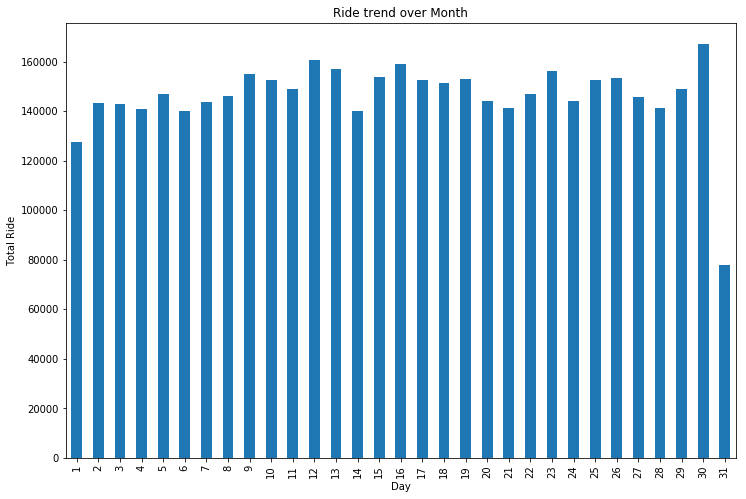

In [31]:
#journey taken over month
plt.figure(figsize=(12,8))
combineUberDataAprSep.groupby('Day').count()['Base'].plot(kind='bar')
plt.ylabel('Total Rides')
plt.title('Ride trend over Month');

#we can see the no of ride's are less on 1st and 31st as compared to other days

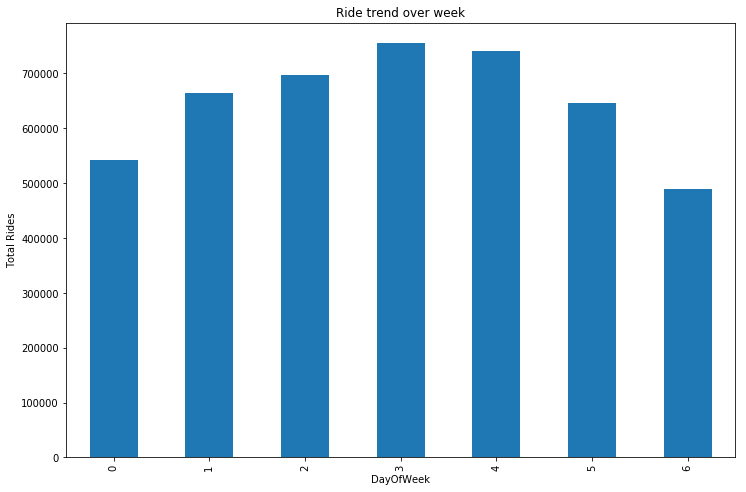

In [34]:
#rides taken over week where 1 denotes monday
plt.figure(figsize=(12,8))
combineUberDataAprSep.groupby('DayOfWeek').count()['Base'].plot(kind='bar')
plt.ylabel('Total Rides')
plt.title('Ride trend over week');

#here we can see the as the week progresses no of rides increase
#thursday has the higest no of rides

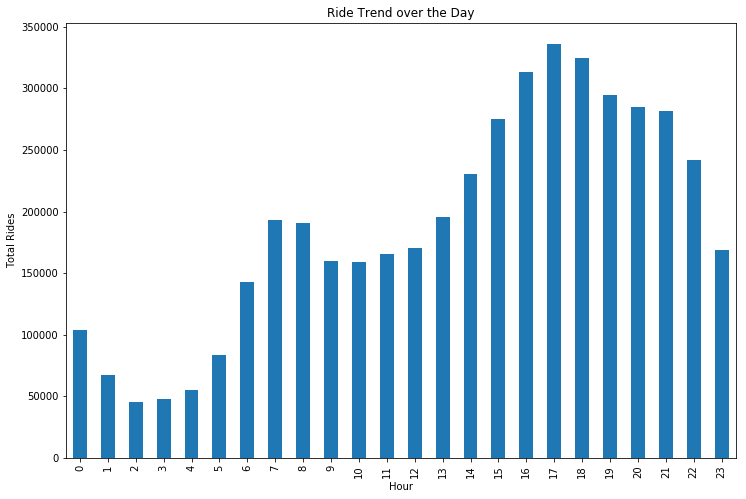

In [35]:
#rides taken over by the hour in a day
plt.figure(figsize=(12,8))
combineUberDataAprSep.groupby('Hour').count()['Base'].plot(kind='bar')
plt.ylabel('Total Rides')
plt.title('Ride Trend over the Day');

#as the day progress after 9am no of rides also increases
#no of rides are high btw 4-7

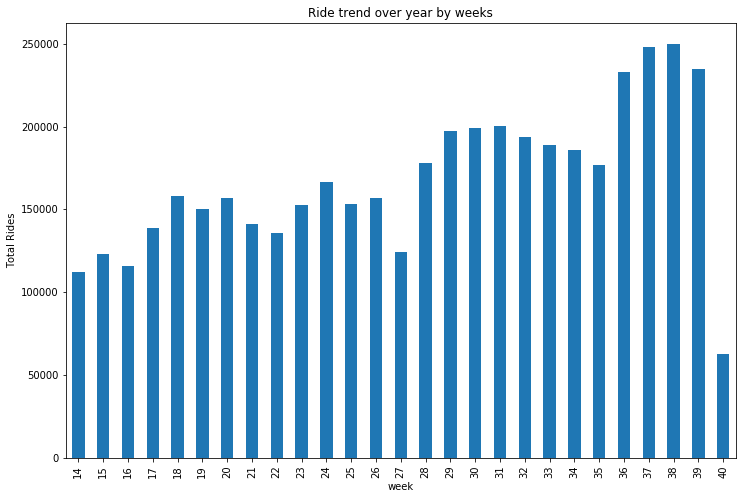

In [13]:
#rides taken over year by weeks
plt.figure(figsize=(12,8))
combineUberDataAprSep.groupby('week').count()['Base'].plot(kind='bar')
plt.ylabel('Total Rides')
plt.title('Ride trend over year by weeks');

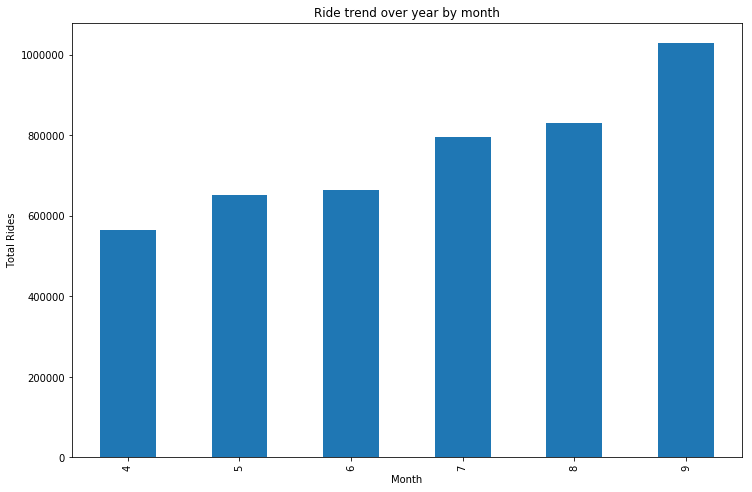

In [14]:
#rides taken over year by month
plt.figure(figsize=(12,8))
combineUberDataAprSep.groupby('Month').count()['Base'].plot(kind='bar')
plt.ylabel('Total Rides')
plt.title('Ride trend over year by month');


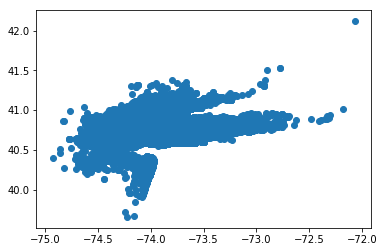

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x = combineUberDataAprSep['Lon'], y = combineUberDataAprSep['Lat'])
plt.show()

In [28]:
#lets look at active vehical numbers "uberJanFebFOIL"
#separating the date
#1-30
uberJanFebFOIL['Day'] = uberJanFebFOIL['Date/Time'].dt.day
#1-12
uberJanFebFOIL['Month'] = uberJanFebFOIL['Date/Time'].dt.month
#0-6
uberJanFebFOIL['DayOfWeek'] = uberJanFebFOIL['Date/Time'].dt.dayofweek
#Monday-Sunday
uberJanFebFOIL['DayName'] = uberJanFebFOIL['Date/Time'].dt.weekday_name

uberJanFebFOIL.head()

,Dispatching_Base_No,Date/Time,active_vehicles,trips,Day,Month,DayOfWeek,DayName
0,B02512,2015-01-01,190,1132,1,1,3,Thursday
1,B02765,2015-01-01,225,1765,1,1,3,Thursday
2,B02764,2015-01-01,3427,29421,1,1,3,Thursday
3,B02682,2015-01-01,945,7679,1,1,3,Thursday
4,B02617,2015-01-01,1228,9537,1,1,3,Thursday


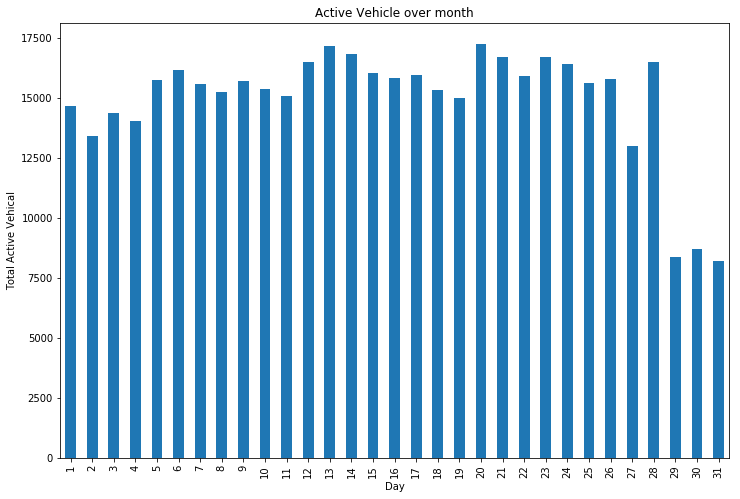

In [31]:
# Active Vehicle for month
plt.figure(figsize=(12,8))
uberJanFebFOIL.groupby('Day')['active_vehicles'].sum().plot(kind='bar')
plt.ylabel('Total Active Vehical')
plt.title('Active Vehicle over month');


In [ ]:
#lets look at over lapping bases
#uber vs other fhv
Uber_BaseNo = set(uberJanFebFOIL['Dispatching_Base_No'].unique())
FHV_services_jan_aug_2015 = set(FHV_services_jan_aug_2015['Base_No'].unique())